In [67]:
%matplotlib inline

from keras import backend as K
from keras.callbacks import TensorBoard
from keras import objectives, regularizers
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout, Lambda, Activation
from keras.models import Model, Sequential

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import io

from keras.datasets import mnist
#from keras.activations import softmax

from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

from keras.regularizers import Regularizer

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [131]:
# information dimension regularization penalty
def id_reg(act):
    lam = 1e-2
    #p = act / K.sum(act, axis=1)[:,None]
    p = K.softmax(act)
    H = -K.sum(p * K.log(p + 1e-9), axis=1)
    return lam * H

In [132]:
batch_size = 100
latent_dim = 2
epochs = 3
p_dropout = 0.01
lr = 0.001

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
e = BatchNormalization(scale=False)(input_layer)
e = Dropout(p_dropout)(e)
e = Dense(1024, activation='relu',activity_regularizer=id_reg)(e)
e = Dense(512, activation='relu')(e)
e = Dense(256, activation='relu')(e)
e = Dense(latent_dim, activation='linear')(e)
d = Dense(256, activation='relu')(e)
d = Dense(512, activation='relu')(d)
d = Dense(1024, activation='relu')(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)

In [133]:
adam = Adam(lr=lr)
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 50s - loss: 0.2240 - val_loss: 0.1931
Epoch 2/3
60000/60000 [==============================] - 48s - loss: 0.1888 - val_loss: 0.1840
Epoch 3/3
60000/60000 [==============================] - 47s - loss: 0.1827 - val_loss: 0.1800


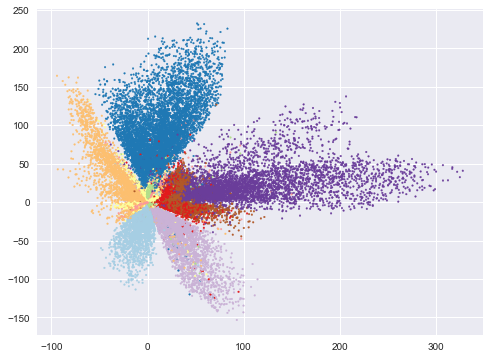

In [96]:
# plot train, embedding layer
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, s=3, cmap="Paired")
plt.show()

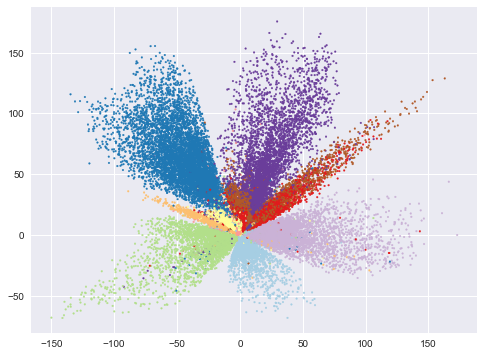

In [100]:
# plot train, embedding layer
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, s=3, cmap="Paired")
plt.show()

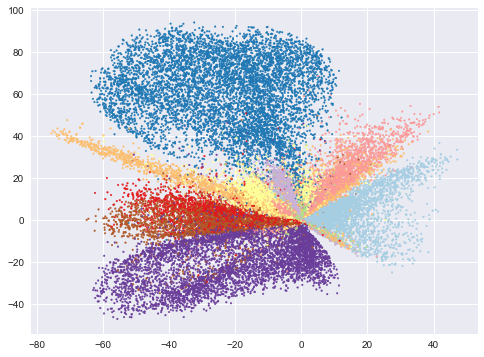

In [105]:
# plot train, embedding layer
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, s=3, cmap="Paired")
plt.show()

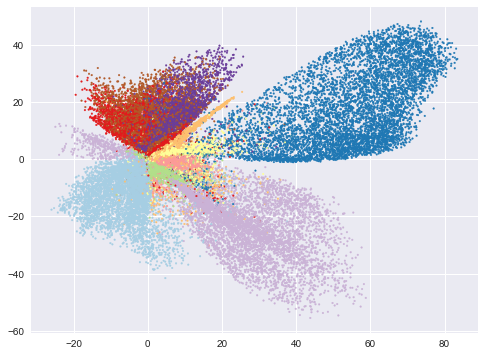

In [134]:
# plot train, embedding layer
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, s=3, cmap="Paired")
plt.show()